In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import express as px
import seaborn as sns
from scipy.stats import pearsonr , spearmanr


In [2]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [3]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [4]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
823,276-75-6884,A,Yangon,Normal,Female,Health and beauty,68.71,3,10.31,216.44,3/4/2019,10:05,Cash,206.13,4.76,10.31,8.70
28,145-94-9061,B,Mandalay,Normal,Female,Food and beverages,88.36,5,22.09,463.89,1/25/2019,19:48,Cash,441.80,4.76,22.09,9.60
285,498-41-1961,B,Mandalay,Normal,Male,Health and beauty,66.68,5,16.67,350.07,2/20/2019,18:01,Cash,333.40,4.76,16.67,7.60
356,632-90-0281,C,Naypyitaw,Normal,Female,Fashion accessories,37.55,10,18.77,394.27,3/8/2019,20:01,Credit card,375.50,4.76,18.77,9.30
192,286-43-6208,C,Naypyitaw,Normal,Female,Food and beverages,87.80,9,39.51,829.71,3/16/2019,19:08,Cash,790.20,4.76,39.51,9.20


In [5]:
df.shape

(1000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Convert categorical columns to ```category```**

In [7]:
df['Branch'] = df['Branch'].astype('category')
df['City'] = df['City'].astype('category')
df['Customer type'] = df['Customer type'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Product line'] = df['Product line'].astype('category')
df['Payment'] = df['Payment'].astype('category')

**Convert 'Date' and 'Time' to ```datetime```**

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

**The Distribution of Sales across the Three Branches**

In [9]:
# Calculate the total sales for each branch
sales_by_branch = df.groupby('Branch' , observed=False)['Total'].sum().reset_index()
sales_by_branch

,Branch,Total
0,A,106200.37
1,B,106197.67
2,C,110568.71


In [10]:
px.bar(data_frame=sales_by_branch , x='Branch' , y='Total' , color='Branch' , labels={'Total':'Total Sales'})

The bar chart shows the total sales for three branches (A, B, and C). Branch C has the highest sales,
followed by Branch A and then Branch B.

**How does the sales revenue vary between different cities where the supermarkets are located ⁉**

In [11]:
# Calculate the total sales for each city
sales_by_city = df.groupby('City' , observed=False )['Total'].sum().reset_index().sort_values(by='Total')
sales_by_city

,City,Total
0,Mandalay,106197.67
2,Yangon,106200.37
1,Naypyitaw,110568.71


In [12]:
px.bar(data_frame=sales_by_city , x='City' , y='Total' , color='City' , labels={'Total':'Total Sales'})

The bar chart shows the total sales for three cities (Mandalay, Naypyitaw, and Yangon). Naypyitaw has the highest sales, followed by Yangon and then Mandalay.

#### Are there differences in purchasing behavior between members and non-members?
* To explore whether there are differences in purchasing behavior between members and non-members, we can compare the average Total sales

In [13]:
# Calculate the average sales for each customer type
avg_sales_by_customer_type = df.groupby('Customer type' , observed=False)['Total'].mean().reset_index().sort_values(by = 'Total' , ascending=False)
avg_sales_by_customer_type

,Customer type,Total
0,Member,327.79
1,Normal,318.12


In [14]:
px.bar(data_frame=avg_sales_by_customer_type , x='Customer type' , y='Total' , color='Customer type' , labels={'Total':'Total Sales'})

Members have a significantly higher total sales compared to non-members. This suggests that membership programs may be effective in encouraging increased spending among customers.

#### Is there a gender-based difference in the types of products purchased?
* To analyze whether there are gender-based differences in the types of products purchased, I can create a plot that shows the distribution of product types ```(Product line)``` across different genders ```(Gender)```. This can be visualized using a count plot or a stacked bar plot.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



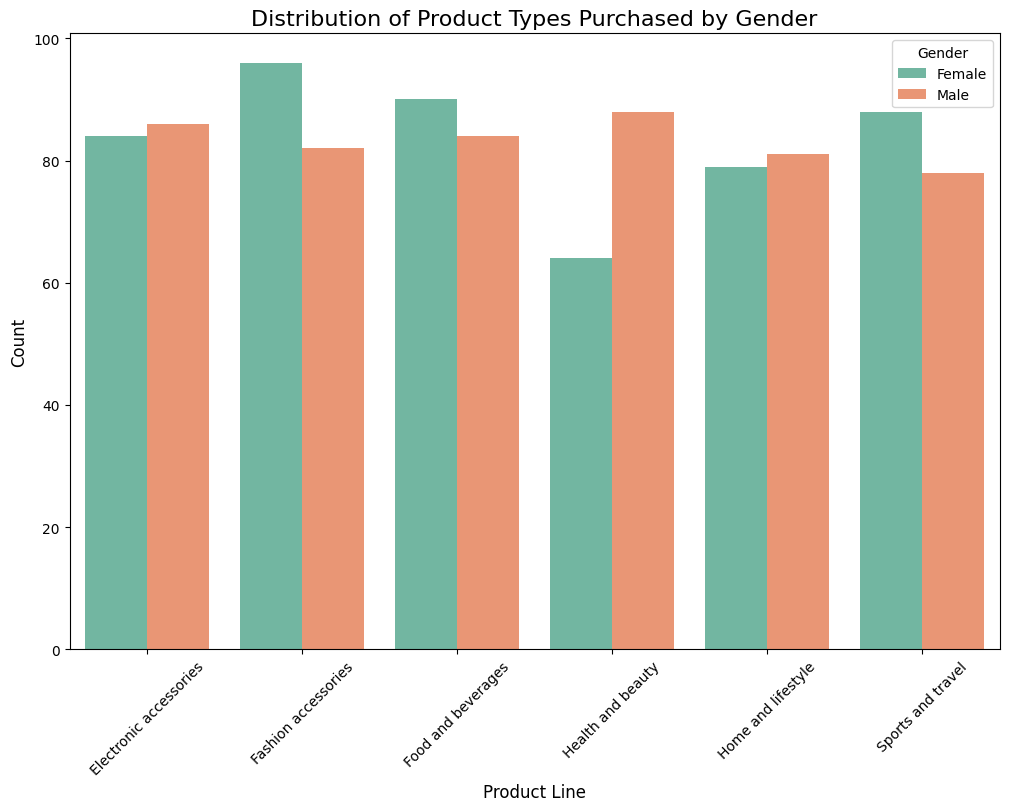

In [15]:
# Plotting the count of product lines by gender
plt.figure(figsize=(12, 8))
sns.countplot(x='Product line', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Product Types Purchased by Gender', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Distribution of product types purchased by gender, illustrating potential differences in purchasing preferences. Note that while males may be the purchasers, the actual consumers could vary, with some products potentially being used by females.

**Which product line generates the highest revenue ?**

In [16]:
# Group by 'Product line' and calculate the sum of 'Total' for each group
revenue_by_product_line = df.groupby('Product line' , observed=False)['Total'].sum().reset_index()

# Sort the results in descending order to find the highest revenue
revenue_by_product_line = revenue_by_product_line.sort_values(by='Total', ascending=False)

revenue_by_product_line

,Product line,Total
2,Food and beverages,56144.84
5,Sports and travel,55122.83
0,Electronic accessories,54337.53
1,Fashion accessories,54305.89
4,Home and lifestyle,53861.91
3,Health and beauty,49193.74


In [17]:
fig = px.pie(
    revenue_by_product_line,
    names='Product line', 
    values='Total', 
    title='Revenue by Product Line', 
    hole=0.3,            
)
fig.update_traces(
    textposition='outside', 
    textinfo='percent+label' 
)

fig.show()

### Conclusion
* From the chart, we can see that Food and Beverages is the top revenue-generating product line, although the differences between product lines are relatively small, indicating a well-balanced revenue distribution among them.

**What is the most popular time of day for shopping?**

In [18]:
df['Time'] =  pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Time'].head()

0    13
1    10
2    13
3    20
4    10
Name: Time, dtype: int32

In [19]:
time_analysis = df.copy()
time_analysis['Datetime'] = pd.to_datetime(df['Date'].astype('str') + ' ' + df['Time'].astype('str'))
time_analysis.set_index('Datetime', inplace=True)

In [20]:
# List of branches
branches = df['Branch'].unique()

In [21]:
time_analysis[time_analysis['Branch'] == 'A'].resample('h').size()

Datetime
2019-01-01 10:00:00    1
2019-01-01 11:00:00    0
2019-01-01 12:00:00    0
2019-01-01 13:00:00    1
2019-01-01 14:00:00    2
                      ..
2019-03-30 13:00:00    1
2019-03-30 14:00:00    0
2019-03-30 15:00:00    0
2019-03-30 16:00:00    0
2019-03-30 17:00:00    1
Freq: h, Length: 2120, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

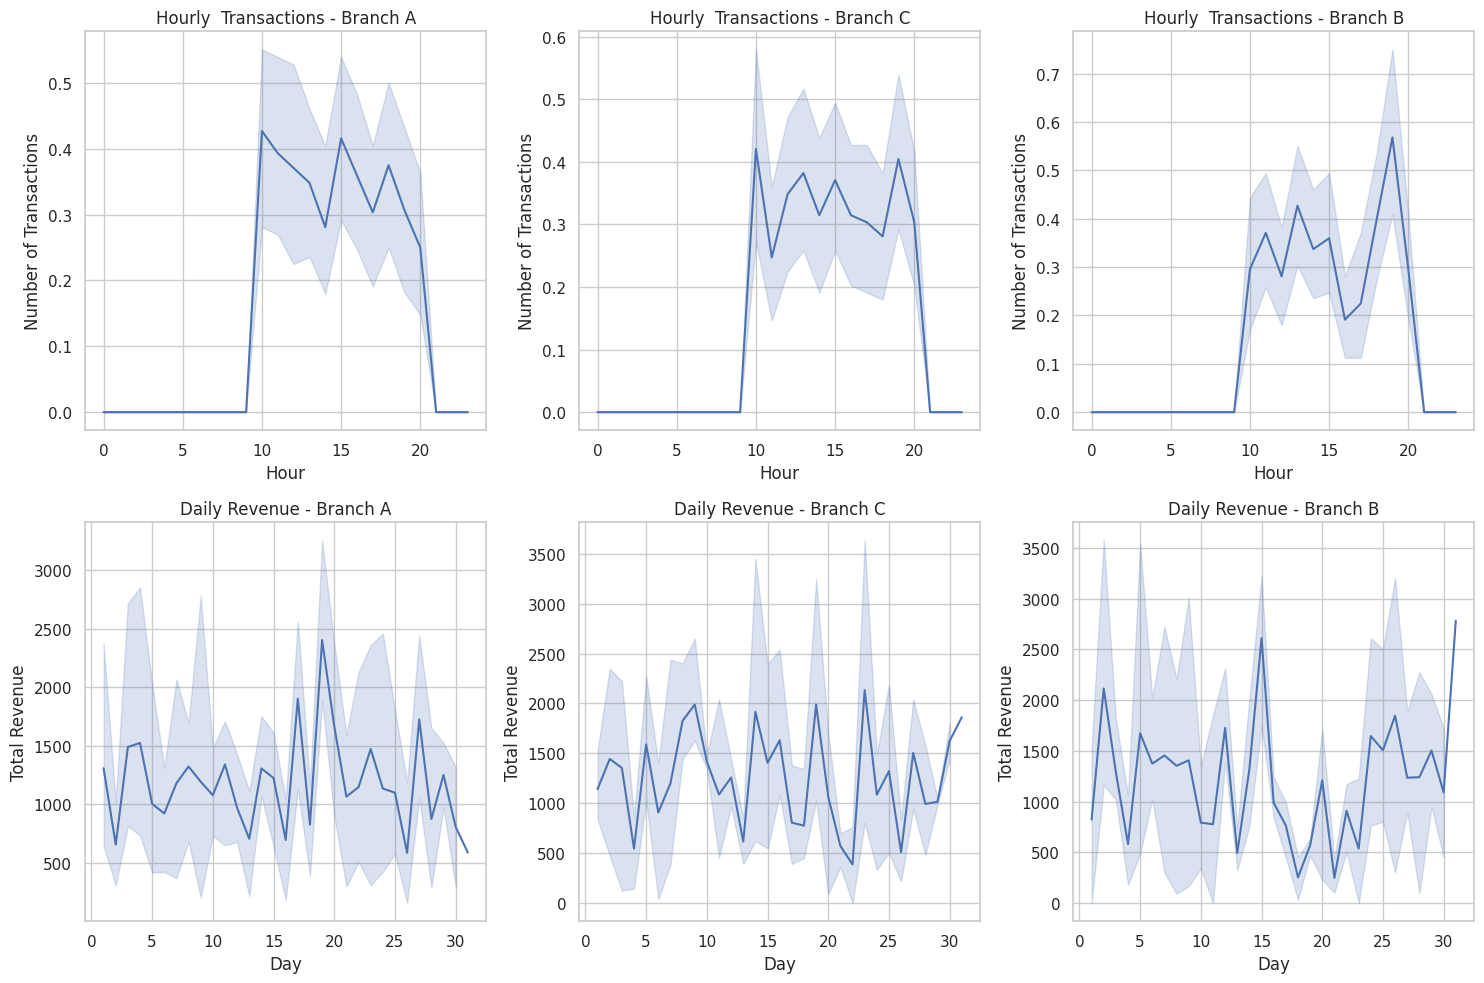

In [22]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 10))

for i, branch in enumerate(branches):
   
    branch_data = time_analysis[time_analysis['Branch'] == branch]

    Hourly_transactions = branch_data.resample('h').size() 
    daily_revenue = branch_data.resample('D')['Total'].sum()  

    plt.subplot(2, len(branches), i + 1)
    sns.lineplot(x=Hourly_transactions.index.hour, y=Hourly_transactions.values)
    plt.title(f'Hourly  Transactions - Branch {branch}')
    plt.xlabel('Hour')
    plt.ylabel('Number of Transactions')

    plt.subplot(2, len(branches), i + 1 + len(branches))
    sns.lineplot(x=daily_revenue.index.day, y=daily_revenue.values)
    plt.title(f'Daily Revenue - Branch {branch}')
    plt.xlabel('Day')
    plt.ylabel('Total Revenue')

plt.tight_layout()


plt.show()

By comparing the peaks in hourly transactions with the peaks in daily revenue, we can identify the most productive hours for each branch. Additionally, the graphs highlight the potential influence of external factors on both transaction volumes and daily revenue.

**Are there specific months when the sales peak?**

Branch A
Datetime
2019-01-31    119
2019-02-28     94
2019-03-31    127
Freq: ME, dtype: int64	Datetime
2019-01-31   38681.13
2019-02-28   29860.12
2019-03-31   37659.12
Freq: ME, Name: Total, dtype: float64
####################################################################################################
Branch C
Datetime
2019-01-31    122
2019-02-28    100
2019-03-31    106
Freq: ME, dtype: int64	Datetime
2019-01-31   40434.68
2019-02-28   32934.98
2019-03-31   37199.04
Freq: ME, Name: Total, dtype: float64
####################################################################################################


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

Branch B
Datetime
2019-01-31    111
2019-02-28    109
2019-03-31    112
Freq: ME, dtype: int64	Datetime
2019-01-31   37176.06
2019-02-28   34424.27
2019-03-31   34597.34
Freq: ME, Name: Total, dtype: float64
####################################################################################################


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



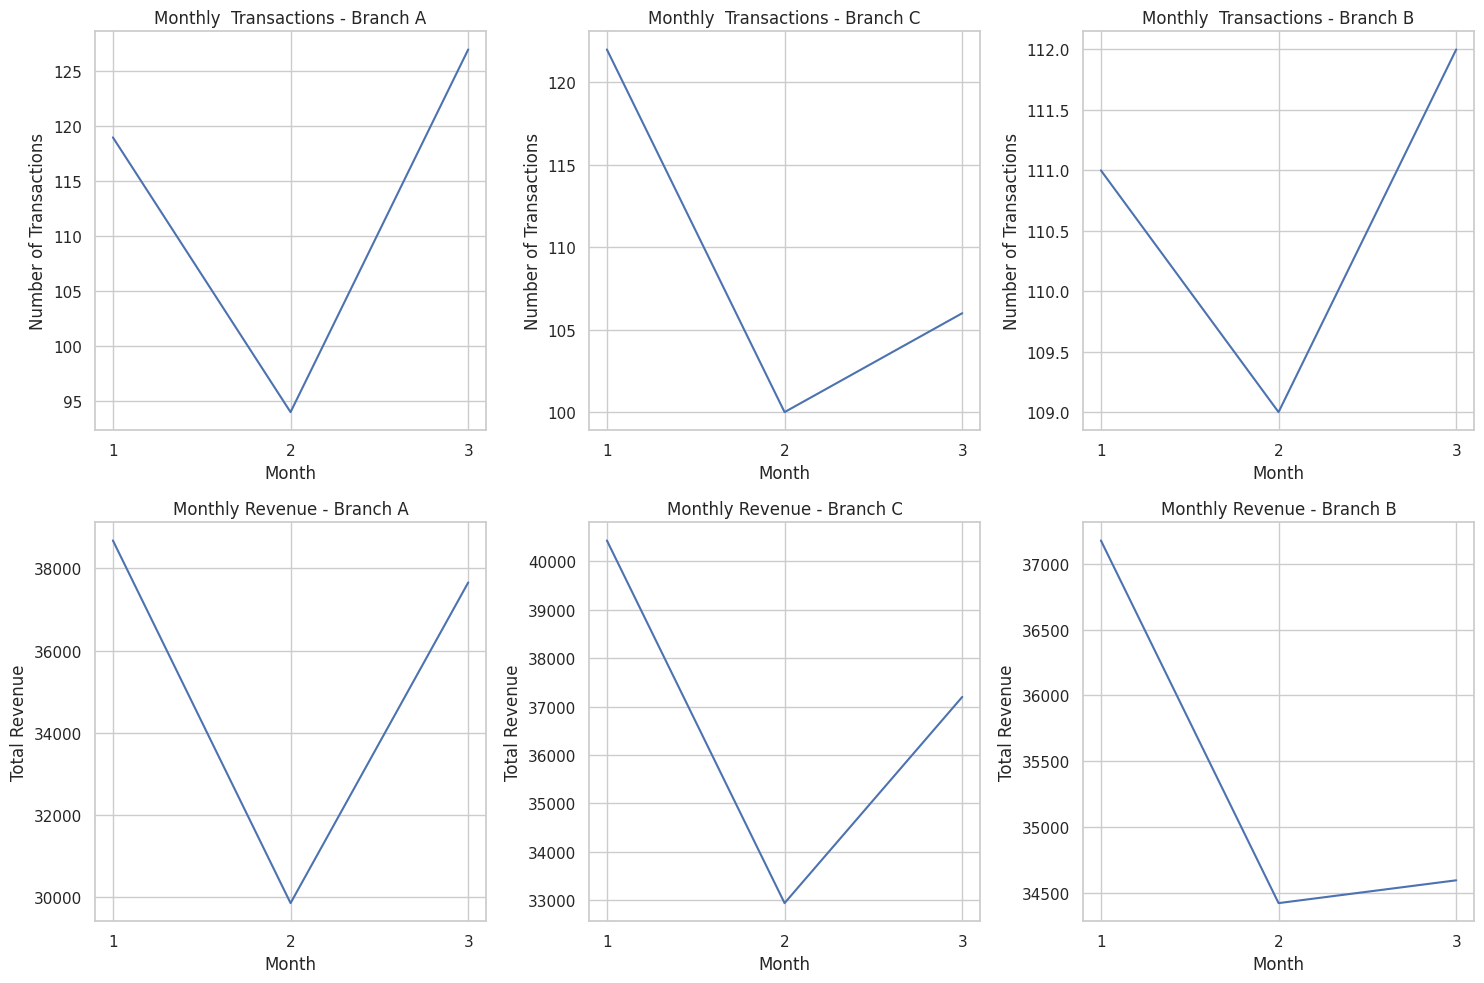

In [23]:
plt.figure(figsize=(15, 10))

for i, branch in enumerate(branches):
   
    branch_data = time_analysis[time_analysis['Branch'] == branch]

    Monthly_transactions = branch_data.resample('ME').size()
    Monthly_revenue = branch_data.resample('ME')['Total'].sum() 
    print(f"Branch {branch}") 
    print(Monthly_transactions , Monthly_revenue , sep='\t') 
    print("#"*100)

    plt.subplot(2, len(branches), i + 1)
    sns.lineplot(x=['1','2','3'], y=Monthly_transactions.values)
    plt.title(f'Monthly  Transactions - Branch {branch}')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')

    plt.subplot(2, len(branches), i + 1 + len(branches))
    sns.lineplot(x=['1','2','3'], y=Monthly_revenue .values)
    plt.title(f'Monthly Revenue - Branch {branch}')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')

plt.tight_layout()


plt.show()

<details><summary>Conclusion</summary>

* Across all three branches, both the number of transactions and revenue show a significant decline in Month 2, followed by a recovery in Month 3. This pattern may suggest a temporary issue or disruption in Month 2 that affected both customer activity and revenue generation, which was later resolved by Month 3.
</details>

**payment method which most commonly used by customers**

In [24]:
# Calculate the frequency of each payment method
payment_method_counts = df[['Payment']].value_counts().reset_index()
payment_method_counts

,Payment,count
0,Ewallet,345
1,Cash,344
2,Credit card,311


In [25]:
# Create a pie chart to visualize the payment method distribution
fig = px.pie(
    payment_method_counts,
    names='Payment', 
    values='count', 
    title='frequency of each payment method'.title(), 
    hole=0.3,            
)
fig.update_traces(
    textposition='outside', 
    textinfo='percent+label' 
)

fig.show()

<details><summary>Conclusion</summary>

* The distribution of payment methods is relatively balanced, with Ewallet and Cash being almost equally popular, and Credit card usage slightly behind. This indicates that customers have diverse preferences for payment methods, but digital payments (Ewallet) are slightly more favored.
</details>

**Is there a correlation between unit price and quantity purchased?**

In [26]:
correlation_matrix = df[['Unit price', 'Quantity']].corr()
correlation_matrix

,Unit price,Quantity
Unit price,1.00,0.01
Quantity,0.01,1.00


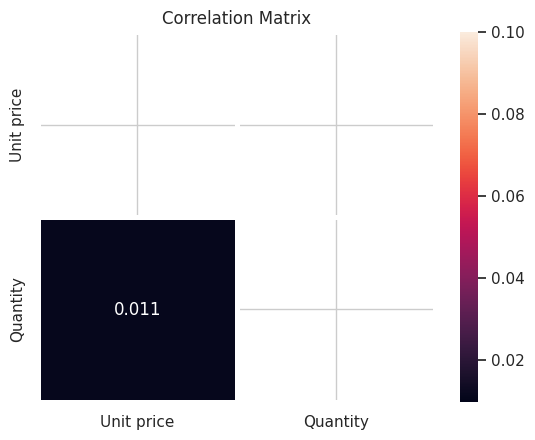

In [27]:
# Create a heatmap to visualize the correlation matrix
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix , annot=True, vmin=0.1, mask=mask, linewidths=2.5)
plt.title('Correlation Matrix')
plt.show()

In [28]:
corr, p_value = pearsonr(df['Unit price'], df['Quantity'])

print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.010777564342497282
P-value: 0.7335552210347178


<details><summary>Conclusion</summary>

* There is no significant linear relationship between the unit price and the quantity purchased. The near-zero correlation coefficient and high p-value indicate that changes in unit price do not appear to be associated with changes in the quantity purchased.
</details>

**How does the cost of goods sold (COGS) vary between product lines?**

In [29]:
# Calculate the average cost of goods sold (COGS) for each product line

average_cogs_by_product_line = df.groupby('Product line' , observed=False)['cogs'].mean().reset_index().sort_values(by = 'cogs' , ascending=False)

average_cogs_by_product_line

,Product line,cogs
4,Home and lifestyle,320.61
5,Sports and travel,316.25
3,Health and beauty,308.23
2,Food and beverages,307.31
0,Electronic accessories,304.41
1,Fashion accessories,290.56


In [30]:
# Bar Plot 

fig = px.bar(
    average_cogs_by_product_line,
    x='Product line', 
    y='cogs', 
    title='Average Cost of Goods Sold (COGS) by Product Line', 
    color='Product line',
    labels={'Product line': 'Product Line', 'cogs': 'Average COGS'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()

<details><summary>Conclusion</summary>

* The "Home and lifestyle" product line has the highest COGS, followed closely by "Sports and travel" and "Health and beauty." "Fashion accessories" has the lowest COGS. This information could be useful for pricing strategies, cost management, or determining profitability for each product line.

</details>

**The gross margin percentage for each branch**

In [31]:
df['gross margin percentage'].value_counts()

gross margin percentage
4.76    1000
Name: count, dtype: int64

In [32]:
gross_margin_percentage = df.groupby('Branch' , observed=False)['gross margin percentage'].mean().reset_index().sort_values(by = 'gross margin percentage' , ascending=False)

gross_margin_percentage

,Branch,gross margin percentage
0,A,4.76
1,B,4.76
2,C,4.76


<details><summary>Conclusion</summary>

* The gross margin percentage is consistent across all branches at 4.76%. This consistency could indicate standard pricing, cost controls, or similar product mixes across the branches. Given the large number of transactions (1000), this gross margin percentage is a robust indicator of profitability for the branches.

</details>

**The relationship between the gross income and the rating given by customers**

In [33]:
pearson_corr, p_value_pearson = pearsonr(df['gross income'], df['Rating'])
spearman_corr, p_value_spearman = spearmanr(df['gross income'], df['Rating'])

print(f"Pearson Correlation Coefficient: {pearson_corr}, P-value: {p_value_pearson}")
print(f"Spearman Correlation Coefficient: {spearman_corr}, P-value: {p_value_spearman}")

Pearson Correlation Coefficient: -0.03644170499701836, P-value: 0.24959690975439003
Spearman Correlation Coefficient: -0.017225932601977776, P-value: 0.5863789353251487


<details><summary>Conclusion</summary>

* Both the Pearson and Spearman correlation coefficients indicate a very weak and statistically insignificant relationship between total income and customer ratings. The high P-values in both tests suggest that the observed relationships could be due to random variation and do not reflect a meaningful relationship between the variables. In other words, there is no strong evidence to suggest that customer ratings significantly affect total income or vice versa.

</details>

**How does the average rating vary for different product lines?**

In [34]:
average_rating_by_product_line = df.groupby('Product line' , observed=False)['Rating'].mean().reset_index().sort_values(by = 'Rating' , ascending=False)

average_rating_by_product_line

,Product line,Rating
2,Food and beverages,7.11
1,Fashion accessories,7.03
3,Health and beauty,7.00
0,Electronic accessories,6.92
5,Sports and travel,6.92
4,Home and lifestyle,6.84


<details><summary>General Insight</summary>

* The ratings suggest that customers generally have a positive view of the product lines, with Food and Beverages and Fashion Accessories receiving the highest satisfaction. Conversely, Home and Lifestyle has the lowest average rating among the categories analyzed, which may indicate potential areas for improvement or differing customer expectations.

</details>

**The distribution of ratings across different branches**

In [35]:
branch_rating_counts = df.groupby('Branch' , observed=False)['Rating'].value_counts().reset_index(name='count')

branch_rating_counts.sample(5)

,Branch,Rating,count
169,C,4.50,4
55,A,8.90,3
128,C,5.50,7
26,A,9.30,6
86,B,9.60,6


In [36]:
fig = px.histogram(
    branch_rating_counts,
    x='Rating', 
    y='count', 
    color='Branch', 
    title='Distribution of Ratings Across Branches',
    labels={'Rating': 'Rating', 'count': 'Count', 'Branch': 'Branch'},
    color_discrete_sequence=px.colors.qualitative.Set2,
    facet_col='Branch',
    facet_col_wrap=2 ,
    opacity=0.8,
)

fig.show()


**The relationship between the total purchase amount and the customer rating**

In [37]:
# Calculate Pearson correlation
pearson_corr, pearson_p_value = pearsonr(df['Total'], df['Rating'])
print(f'Pearson correlation coefficient: {pearson_corr}')
print(f'Pearson p-value: {pearson_p_value}')

# Calculate Spearman correlation
spearman_corr, spearman_p_value = spearmanr(df['Total'], df['Rating'])
print(f'Spearman correlation coefficient: {spearman_corr}')
print(f'Spearman p-value: {spearman_p_value}')

Pearson correlation coefficient: -0.03644170499701835
Pearson p-value: 0.24959690975439003
Spearman correlation coefficient: -0.017225932601977776
Spearman p-value: 0.5863789353251487


<details><summary>General Conclusion</summary>

* Both the Pearson and Spearman correlation analyses show very weak and statistically insignificant relationships between total purchase amount and customer rating. The high p-values indicate that there is no strong evidence of a meaningful relationship between these two variables in your dataset.

</details>

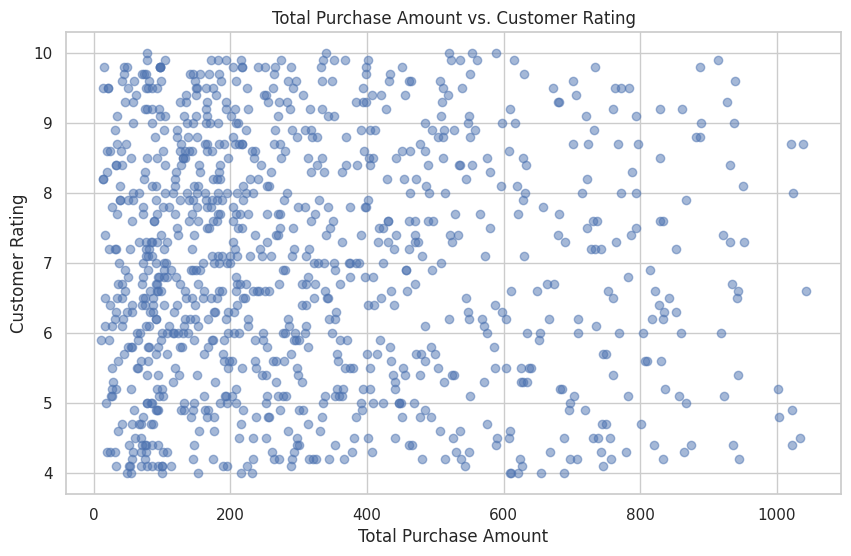

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Total'], df['Rating'], alpha=0.5)
plt.title('Total Purchase Amount vs. Customer Rating')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Customer Rating')
plt.grid(True)
plt.show()

**How do the sales quantities vary between different product lines?**

In [39]:
sales_quantity_by_product_line = df.groupby('Product line' , observed=False)['Quantity'].sum().reset_index().sort_values(by = 'Quantity' , ascending=False)

sales_quantity_by_product_line

,Product line,Quantity
0,Electronic accessories,971
2,Food and beverages,952
5,Sports and travel,920
4,Home and lifestyle,911
1,Fashion accessories,902
3,Health and beauty,854


In [40]:
# pie charts

fig = px.pie(
    sales_quantity_by_product_line,
    names='Product line', 
    values='Quantity', 
    title='Sales Quantities by Product Line', 
    hole=0.1,
    color_discrete_sequence=px.colors.qualitative.Set2 ,             
)

fig.update_traces(
    textposition='outside', 
    textinfo='percent+label' 
)

fig.show()

**The average total purchase amount per city**

In [41]:
average_total_purchase_amount_by_city = df.groupby('City' , observed=False)['Total'].mean().reset_index().sort_values(by = 'Total' , ascending=False)

average_total_purchase_amount_by_city

,City,Total
1,Naypyitaw,337.10
0,Mandalay,319.87
2,Yangon,312.35


**Are there specific days of the week that have higher sales?**

In [42]:
week_days = df.loc[:,['Date' , 'Total']]
week_days['Day of Week'] = df['Date'].dt.day_name()

sales_by_day = week_days.groupby('Day of Week')['Total'].sum().sort_values(ascending=False)

sales_by_day

Day of Week
Saturday    56120.81
Tuesday     51482.25
Thursday    45349.25
Sunday      44457.89
Friday      43926.34
Wednesday   43731.14
Monday      37899.08
Name: Total, dtype: float64

In [43]:
fig = px.pie(
    sales_by_day,
    names=sales_by_day.index, 
    values=sales_by_day.values, 
    title='Sales by Day of Week', 
    hole=0.1,
    color_discrete_sequence=px.colors.qualitative.Set2 ,             
)

fig.update_traces(
    textposition='outside', 
    textinfo='percent+label' 
)

fig.show()

**How does the tax amount affect the total purchase price for different product lines?**

In [44]:
tax_amount_by_product_line = df.groupby('Product line' , observed=False).agg({'Tax 5%': 'mean', 'Total': 'mean'}).reset_index().sort_values(by = 'Tax 5%' , ascending=False)

tax_amount_by_product_line

,Product line,Tax 5%,Total
4,Home and lifestyle,16.03,336.64
5,Sports and travel,15.81,332.07
3,Health and beauty,15.41,323.64
2,Food and beverages,15.37,322.67
0,Electronic accessories,15.22,319.63
1,Fashion accessories,14.53,305.09


In [45]:
tax_total_corr, tax_total_p_value = pearsonr(tax_amount_by_product_line['Tax 5%'], tax_amount_by_product_line['Total'])
print(f'Pearson correlation coefficient between tax amount and total purchase price: {tax_total_corr}')
print(f'Pearson p-value: {tax_total_p_value}')

Pearson correlation coefficient between tax amount and total purchase price: 1.0
Pearson p-value: 0.0


Conclusion:

* Given that the Pearson correlation coefficient is 1.0 and the p-value is 0.0, it's clear that the tax amount and the total purchase price are perfectly linearly related. This is a strong indicator that the data is consistent with the expected relationship between these two variables.

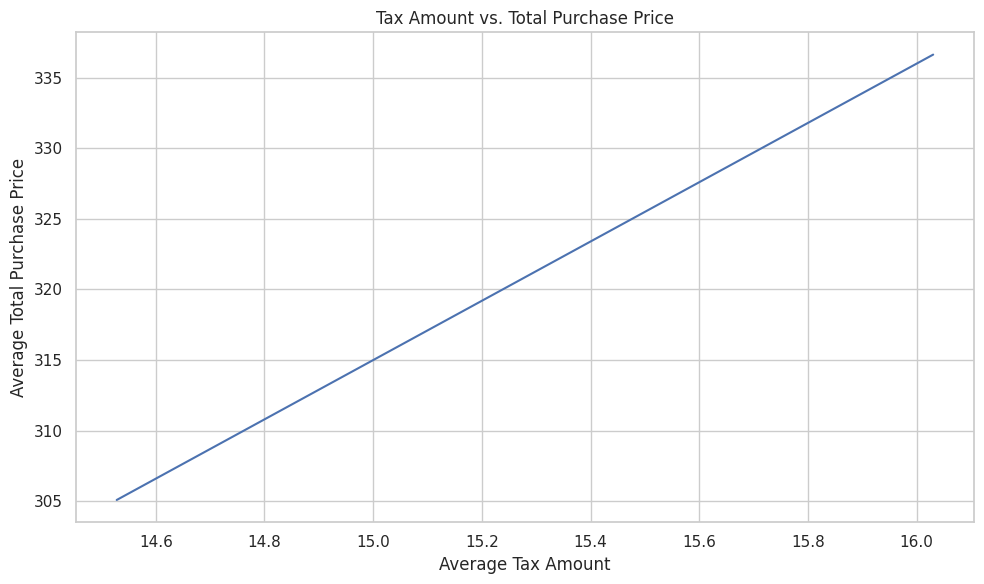

In [46]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tax_amount_by_product_line['Tax 5%'], tax_amount_by_product_line['Total'])
plt.title('Tax Amount vs. Total Purchase Price')
plt.xlabel('Average Tax Amount')
plt.ylabel('Average Total Purchase Price')
plt.grid(True)

plt.tight_layout()
plt.show()

### Daily Trends

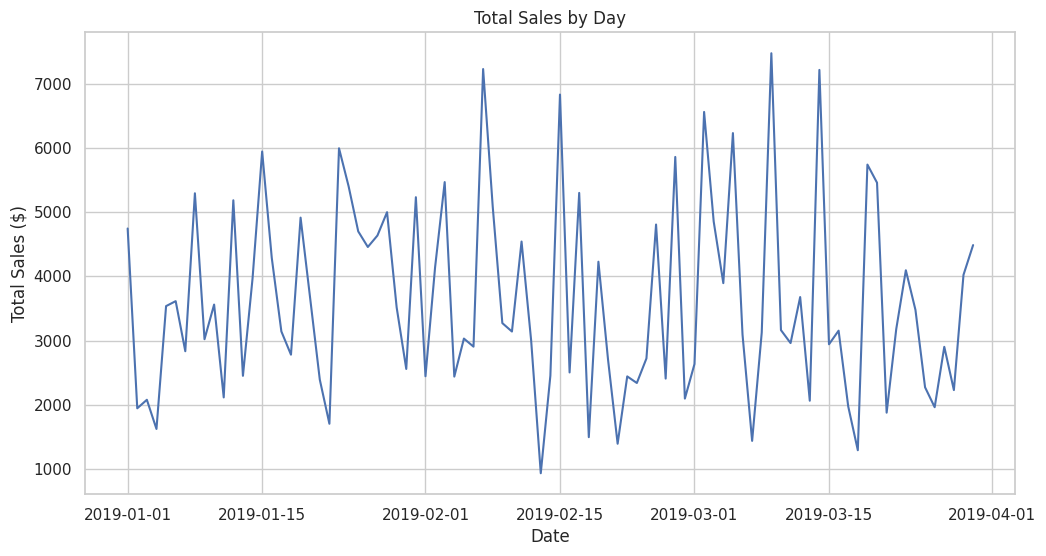

In [47]:
daily_sales = df.groupby(df['Date'].dt.date)['Total'].sum()

# Plot daily sales
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Total Sales by Day')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

### Weekly Trends

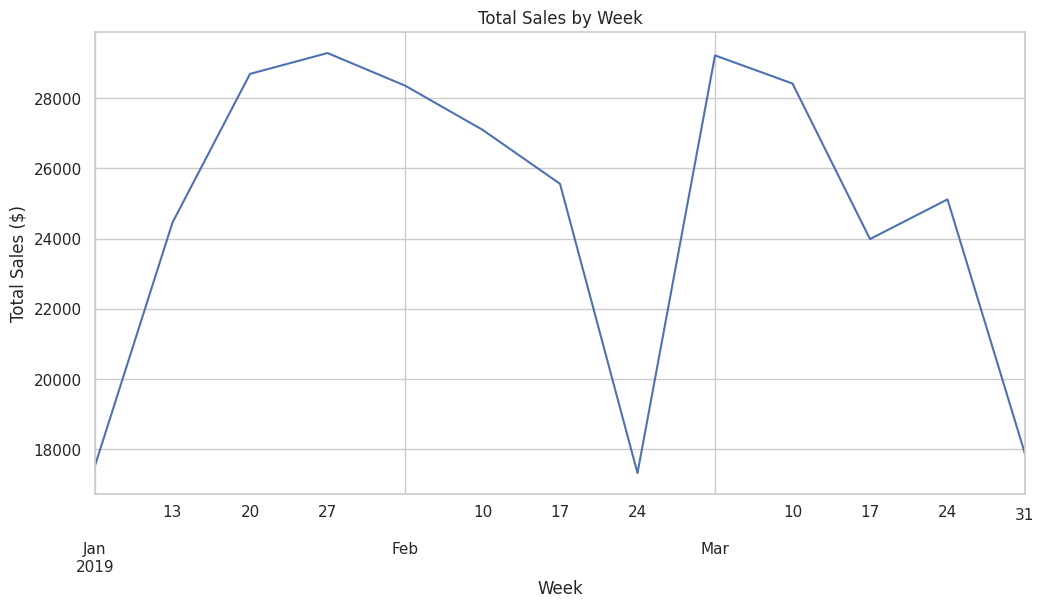

In [48]:
weekly_sales = df.groupby(df['Date'].dt.to_period('W'))['Total'].sum()

plt.figure(figsize=(12, 6))
weekly_sales.plot()
plt.title('Total Sales by Week')
plt.xlabel('Week')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

### Monthly Trends

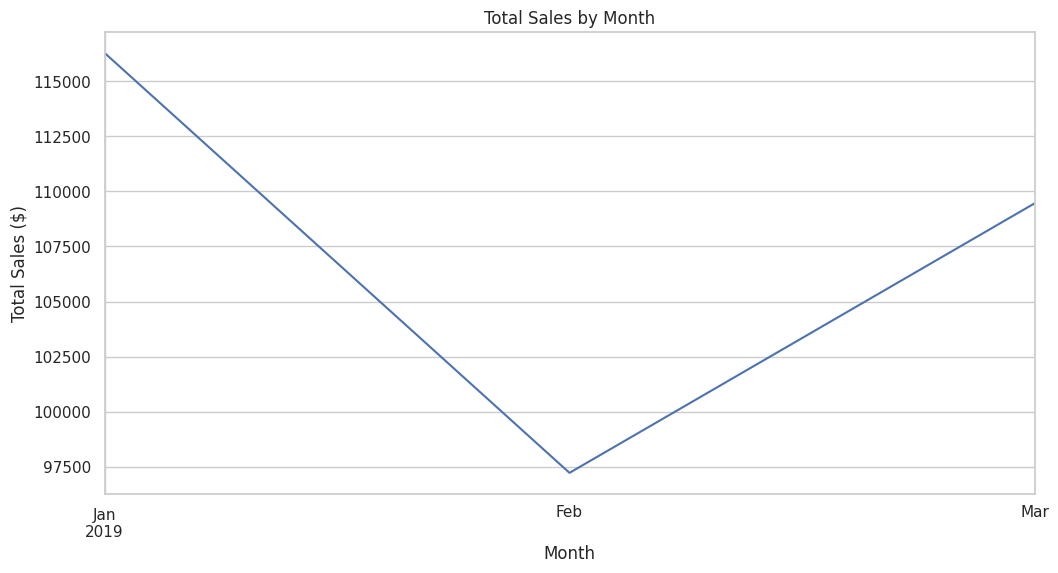

In [49]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()